## Using Kaggle housing data to learn data cleaning and data investigation using vizualizations and statistical tools 
### The goal of the preprocessind data  is to identify and justify using features that will be further included in the modeling.

<span style="color:red">Please note that the work on this project is not complete. I indicated areas of improvement throughout</span>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
from sklearn import linear_model
from sklearn import metrics

Use different methods: . head, . info , . shape to gain understanding on : <br /> 
    how many columns (features)data  has  <br /> 
    how complete the colums are <br /> 
    what data types 
    

In [36]:
kch_data = pd.read_csv('kc_house_data.csv')
kch_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [37]:
kch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [42]:
kch_data.shape

(21613, 21)

In [43]:
kch_data[["sqft_living",'sqft_living15','yr_renovated','sqft_basement','sqft_above']].head(10)
                                                            

,sqft_living,sqft_living15,yr_renovated,sqft_basement,sqft_above
0,1180,1340,0,0,1180
1,2570,1690,1991,400,2170
2,770,2720,0,0,770
3,1960,1360,0,910,1050
4,1680,1800,0,0,1680
5,5420,4760,0,1530,3890
6,1715,2238,0,0,1715
7,1060,1650,0,0,1060
8,1780,1780,0,730,1050
9,1890,2390,0,0,1890


### Run a heat map on all features.
The source code is from Kaggle. I couldn't find the orginal creater to assign proper siting

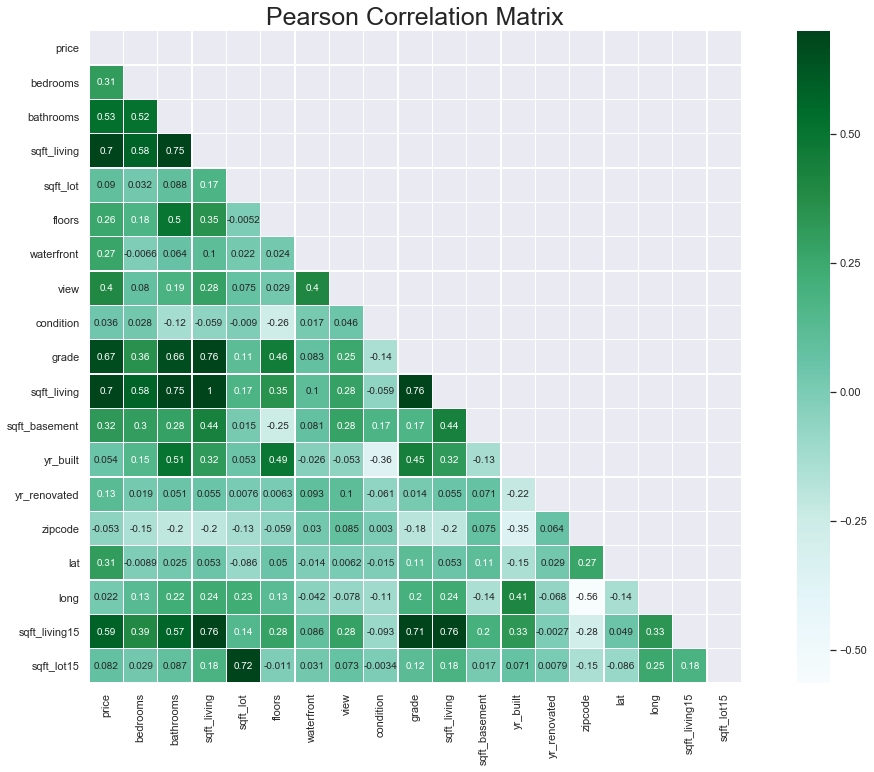

In [125]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_living','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(kch_data[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(20, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(kch_data[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":10},mask=mask,cbar_kws={"shrink": 1});

<span style="color:blue"> *There are too many features with low correlation to price. I ran another map using less features*</span>

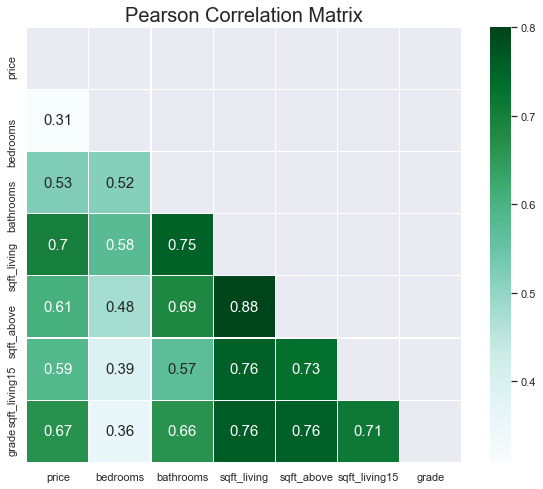

In [121]:
features = ['price','bedrooms','bathrooms','sqft_living',
            'sqft_above','sqft_living15','grade']

mask = np.zeros_like(kch_data[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(10, 8))
plt.title('Pearson Correlation Matrix',fontsize=20)

sns.heatmap(kch_data[features].corr(),linewidths=0.25,vmax=0.8,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":15},mask=mask,cbar_kws={"shrink": 1});

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 11 Text xticklabel objects>)

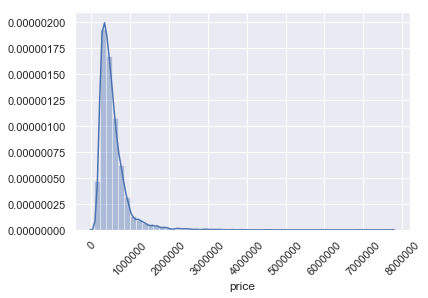

In [46]:
sns.distplot(kch_data['price'])
plt.xticks(rotation=45)

<span style="color:blue">*The price distribution graph shows most house prices are under 200K. Further analysis will
also show that majority of houses are no more than 6 bedrooms. Once I take out outliners price distribution will have less outliers as well* </span>

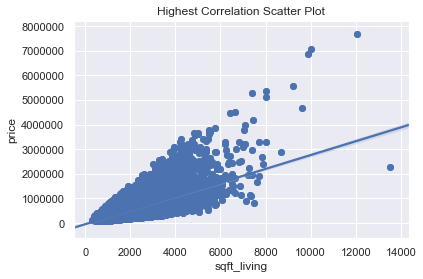

In [126]:
x1=kch_data['sqft_living']
y1= kch_data['price']
plt.scatter(x1,y1)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Highest Correlation Scatter Plot')
sns.regplot(x='sqft_living',y='price',data=kch_data)

<span style="color:blue">SQFT_LIVING *feature has the highest correlation coef from the HeatMap.
I ran simple plot to see visually how data is distributed.
Again looks like if some of the outliers are eliminated this graph will expalain data with more precision*</span>

In [48]:
kch_data['price'].unique()

array([ 221900.,  538000.,  180000., ...,  610685., 1007500.,  402101.])

Text(0.5, 1.0, 'Lat and Longs')

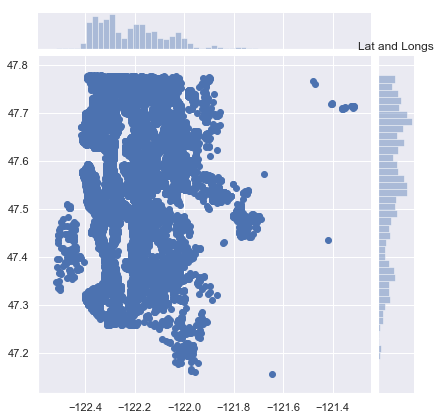

In [129]:
sns.jointplot(x=kch_data.long.values, y=kch_data.lat.values, ratio =8)
plt.title('Lat and Longs')#find out how to move position of title

<span style="color:blue"> *From this map we can see that most houses come from the same area with 
a few distinct clusters and clear outliners* </span>

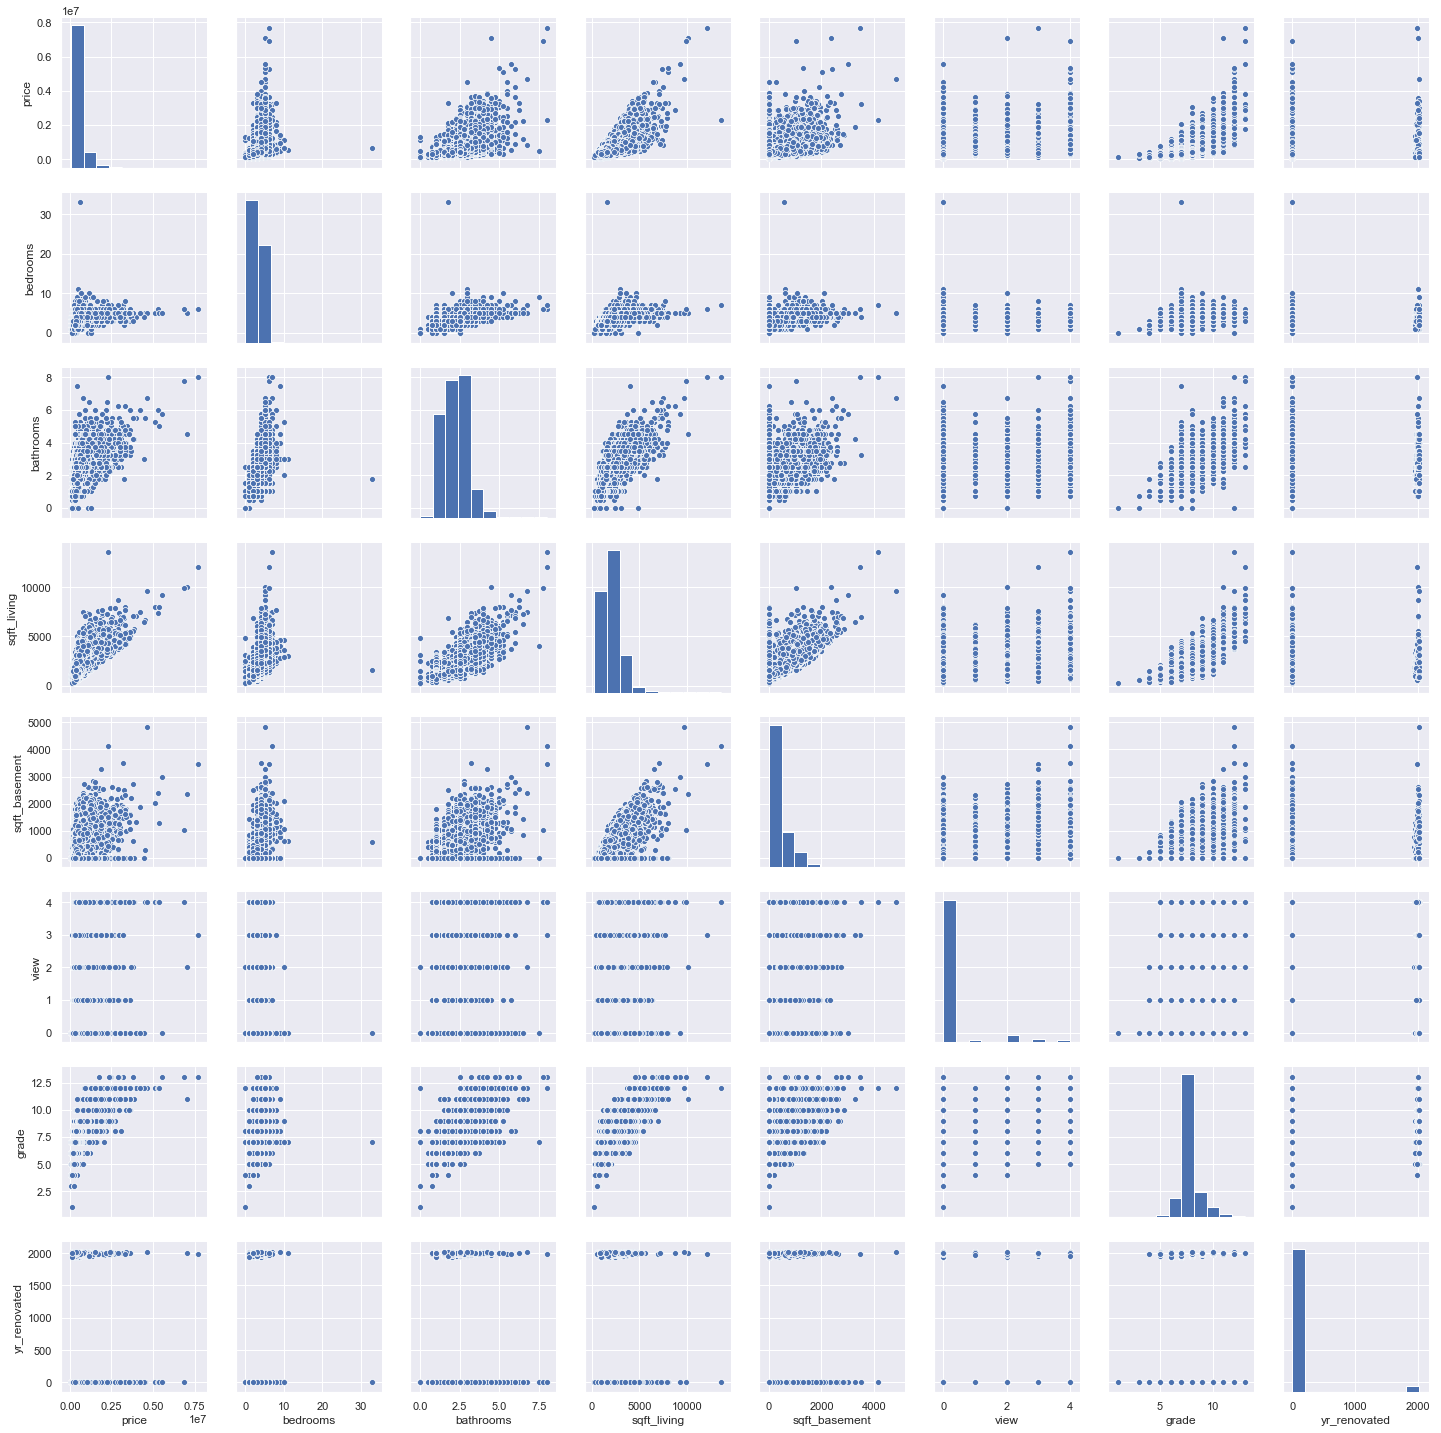

In [137]:
sns.set()
cols=['price','bedrooms','bathrooms','sqft_living','sqft_basement','view',
        'grade','yr_renovated']
sns.pairplot(kch_data[cols], height=2.5)

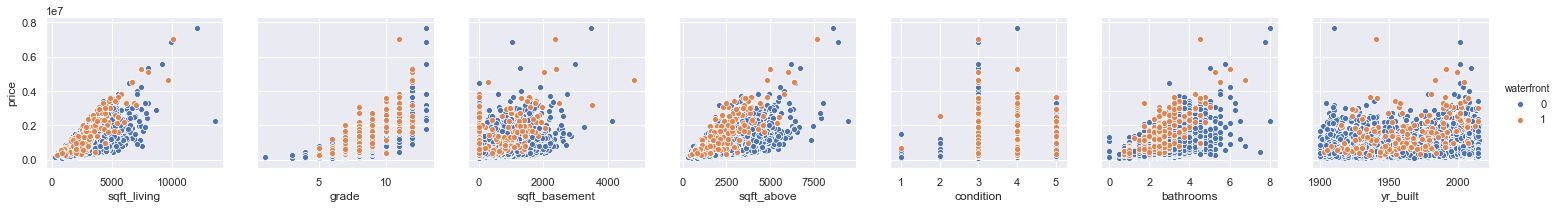

In [134]:
sns.pairplot(kch_data, x_vars=['sqft_living','grade','sqft_basement', 'sqft_above',
                               'condition',"bathrooms", "yr_built"], y_vars=['price'],
             hue='waterfront', height=3)

Upon analyzing joint plot, I chose a few features that seems to have correlation with the price. It is clear that I will be dropping condition. I will investigate futher if I should keep year_built.

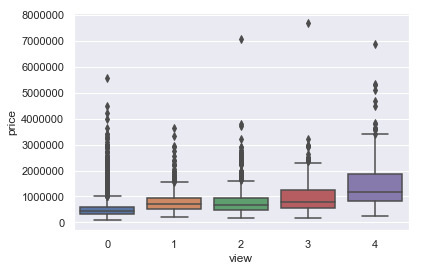

In [15]:
sns.boxplot(x="view",y='price', data=kch_data)

The box plot for view vs price shows that with number of times property is viewed the price is increasing. 
The plot also has large numnber of outliers. From personal experience buying a house I am not sure how to expalain
this feature. I will keep it because it seems to show correlation even though my intuition leads me to believe it is a random correlation



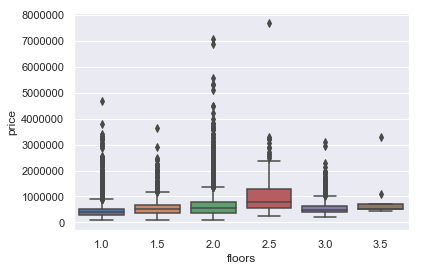

In [16]:
sns.boxplot(x="floors",y='price', data=kch_data)

Number of floors seems to have contribution to the price to a point. It looks like once house has more than 2.5
floors, other features become more important/influential

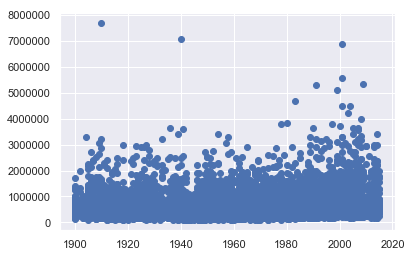

In [17]:
plt.scatter(kch_data.yr_built, kch_data.price)


In [18]:
kch_data['date'].head() # data column includes time. For ploting it doesn't effect results

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

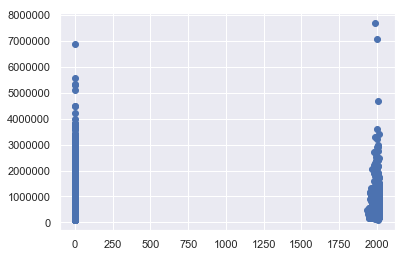

In [131]:
plt.scatter(kch_data.yr_renovated, kch_data.price)

Year_built feature seems to be randomly related to price. I tired to plot year_renovated. Looks like this feature 
needs to be converted to 0,1 to show renovated vs not. There might have more meaning as a feture related to price

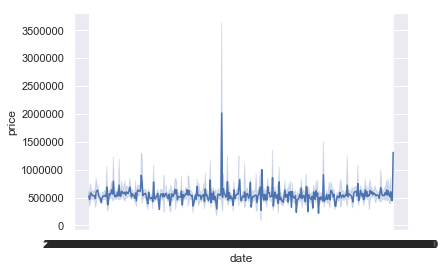

In [132]:
sns.lineplot(x='date',y='price',data=kch_data)

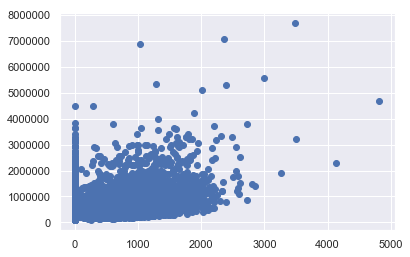

In [65]:
plt.scatter(x="sqft_basement",y='price', data=kch_data)

Looks like size of the basement is somewhat random when it relates to price. I will convert data to has basement or not to cheque if having basment will affect a price for the house

In [56]:
kch_data['basement']=kch_data['sqft_basement'].apply(lambda x: 1 if x!=0 else 0)

In [61]:
kch_data['basement'].head()
#kch_data['basement'].count()

0    0
1    1
2    0
3    1
4    0
Name: basement, dtype: int64

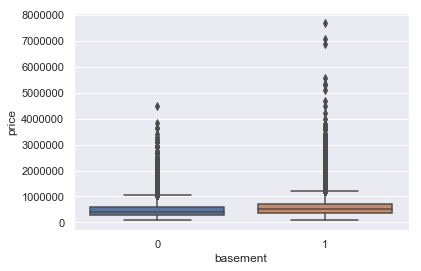

In [66]:
sns.boxplot(x="basement",y='price', data=kch_data)

Now visually looks like keeping basement is good idea as might be an explainable variable for price

In [67]:
X=kch_data.drop(['id','date','lat','long','sqft_lot15','yr_renovated','sqft_living15','sqft_lot','price',
                 'sqft_above','condition','sqft_basement'], axis=1) #features
y=kch_data['price'] #target
X.shape


(21613, 10)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [69]:
X_train.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,yr_built,zipcode,basement
17443,3,2.50,2430,1.0,0,1,8,1978,98136,1
15156,3,1.75,1720,1.0,0,0,8,1978,98032,0
1646,3,1.75,2190,2.0,0,0,8,1978,98042,0
6866,4,3.50,3850,2.0,0,1,11,1995,98033,1
17442,3,2.50,2280,2.0,0,0,9,1984,98074,0


Upon analysis of features given, I decided to keep onces that showed to affect price, and as result would be good 
explanatory variables

In [138]:
from sklearn import linear_model
LM = linear_model.LinearRegression()
LM.fit(X_train,y_train)
y_pred=LM.predict(X_test)
LM_R2=r2_score(y_test, y_pred)
print("R2 score for LR", LM_R2)
print("MSE LR:", mean_squared_error(y_test, y_pred))

R2 score for LR 0.7091032553770599
MSE LR: 34594682795.05697


### Additional regression has been ran to check if including basement as a varible and number of views will make a difference when running simple Linear Regression
R2 score: 0.6507417556266363 no basement <br /> 
MSE: 49104296389.528824 <br /> 
R2 score: 0.650482134940322 adding basement as catergorical feature <br /> 
MSE: 49140798007.84424 <br /> 
R2 score: 0.6554464213065595 adding view to X_train <br /> 
MSE: 48442839425.57057<br /> 
    
#### View should be kept as a feature as it improves R2, while basement feature should not be included as it does little to R2

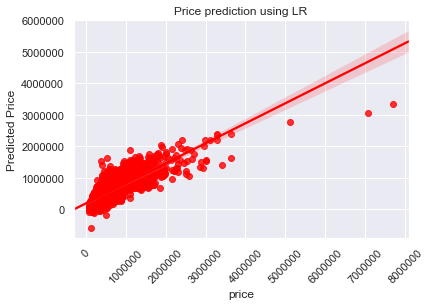

In [71]:

#plt.scatter(y_test, y_pred)
plt.xlabel("Historical Price")
plt.ylabel("Predicted Price")
plt.title('Price prediction using LR')
plt.xticks(rotation=45)
sns.regplot(x=y_test,y= y_pred,data=kch_data, color="red")

In [72]:
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [73]:
SVR =SVR(kernel='linear',max_iter= 4000000,
  tol=0.0001).fit(X_train, y_train)

y_pred=SVR.predict(X_test)
#score_SVR = model_SVR.score(X_test, y_test)  
#print("score_SVR=",score_SVR)
SVR_R2=r2_score(y_test, y_pred)
print("R2 score _SVR:", SVR_R2)
print("MSE_SVR:", mean_squared_error(y_test, y_pred))

R2 score _SVR: 0.5098996742954734
MSE_SVR: 68906123310.49983


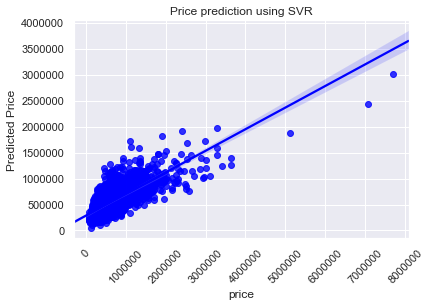

In [74]:
#plt.scatter(y_test, y_pred,color='red')
plt.xlabel("Historical Price")
plt.ylabel("Predicted Price")
plt.title('Price prediction using SVR')
plt.xticks(rotation=45)
sns.regplot(x=y_test,y= y_pred,data=kch_data,color='blue')

Calculate optimal KNN number 

In [75]:
#didnt work. This method is better for classifier

''''err_rate = []

for i in range(1,100):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i = knn.predict(X_test)
    err_rate.append(np.mean(prediction_i != y_test))
    plt.figure(figsize=(16,6))
plt.plot(range(1,100),err_rate,color='green', 
         marker='o',markerfacecolor='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K_Value')
plt.ylabel('Error_Rate')

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-75-c4a509380466>, line 15)

In [139]:
Knn = KNeighborsRegressor(n_neighbors=20).fit(X_train, y_train)
y_pred = Knn.predict(X_test)


In [140]:
KNN_R2=r2_score(y_test,y_pred)
print("R2 score_Knn:", KNN_R2)
print("MSE_Knn:", mean_squared_error(y_test, y_pred))

R2 score_Knn: 0.5939383313550967
MSE_Knn: 48290587232.97301


In [141]:
DTR= DecisionTreeRegressor(random_state=0).fit(X_train,y_train)
y_pred = DTR.predict(X_test)
DTR_R2=r2_score(y_test,y_pred)

In [142]:
print("R2 score_DTR:",DTR_R2)
print("MSE_DTR:", mean_squared_error(y_test, y_pred))

R2 score_DTR: 0.6165974972293481
MSE_DTR: 45595862488.5061


In [143]:
RF = RandomForestRegressor(n_estimators =80 ).fit(X_train, y_train)

y_pred=RF.predict(X_test)
RF_R2=r2_score(y_test, y_pred)
print("R2 score:RF",RF_R2 )
print("MSE_RF:", mean_squared_error(y_test, y_pred))

R2 score:RF 0.8047536451911772
MSE_RF: 23219530078.473465


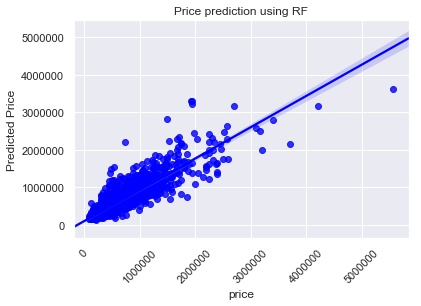

In [144]:
plt.xlabel("Historical Price")
plt.ylabel("Predicted Price")
plt.title('Price prediction using RF')
plt.xticks(rotation=45)

sns.regplot(x=y_test,y= y_pred,data=kch_data,color='blue')

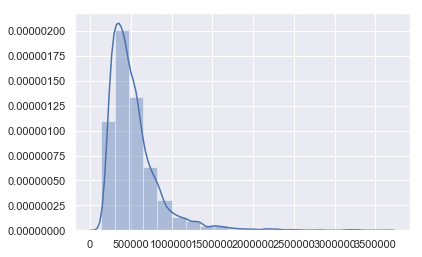

In [145]:
sns.distplot(y_pred,bins=20);

In [146]:
_list=[]
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
PR =LinearRegression().fit(X_train, y_train)  
y_pred=PR.predict(X_test)
#score_PL = model.score(X_test, y_test)
#print('score_PL=',score_PL)
PR_R2=r2_score(y_test, y_pred)
print("R2 score PR :",PR_R2)
print("MSE PR:", mean_squared_error(y_test, y_pred))

R2 score PR : 0.7091032553770599
MSE PR: 34594682795.05697


## Summary table with R2 and Error results
R2 score for LR:   0.65  <br /> 
MSE LR:          48442839425.57057


R2 score PR :     0.7  <br /> 
MSE PR:         35589959987.66141

R2 score _SVR:    0.51  <br /> 
MSE_SVR:        69140819593.15947

R2 score_Knn:     0.58  <br /> 
MSE_Knn:        59219040731.06708
    
R2 score_DTR:     0.65  <br /> 
MSE_DTR:        48654853205.5352


R2 score:RF      0.81  <br /> 
MSE_RF:           27029408138.328114 


In [110]:
# here is more user friendly format to show results: create data frame and run 
#results sorting from highest to lowest
results = pd.DataFrame({'Model' :["PR","DTR","SVR","LM","KNN","RF"], 
                        "Model's R2":[PR_R2,DTR_R2,SVR_R2,LM_R2, KNN_R2,RF_R2]})
results.sort_values(by="Model's R2", ascending=False)


,Model,Model's R2
5,RF,0.812297
0,PR,0.709103
1,DTR,0.668194
3,LM,0.655862
4,KNN,0.579853
2,SVR,0.509900


## Next Steps: 
1.Decide if need to eliminate outliers. See analysis bellow. Can take out ouliers by keeping 0-9 bedrooms only <br /> 
2.Decide if 81% R2 for Random Forest is not over fitting <br /> 
3.Do further clean up which features to use. Some of them are obvious - number of views. But when taking out R2 when down as well. So need to find if it is random or there is a value in keeping features like that

In [109]:
bd = kch_data.groupby('bedrooms').count()
bd

,id,date,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
bedrooms,,,,,,,,,,,,,,,,,,,,,
0,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
1,199,199,199,199,199,199,199,199,199,199,...,199,199,199,199,199,199,199,199,199,199
2,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,...,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760
3,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,...,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824
4,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,...,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882
5,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,...,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601
6,272,272,272,272,272,272,272,272,272,272,...,272,272,272,272,272,272,272,272,272,272
7,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
8,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13


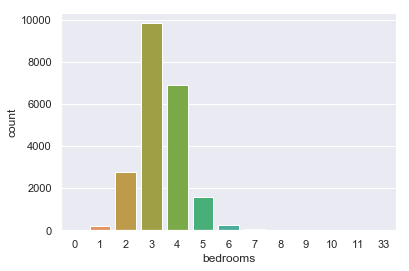

In [108]:
sns.countplot(x='bedrooms', data=kch_data)

In [100]:
models= [("LR",LinearRegression()),("DTR", DecisionTreeRegressor()),
         ('KNN',KNeighborsRegressor()),('RFR',RandomForestRegressor())]

In [115]:
results =[]

for name, model in models:
    _model= model
    _model.fit(X_train,y_train)
    _prediction=_model.predict(X_test)
    #r2_score(y_test, _prediction)
    _score=r2_score(y_test, _prediction)
    model_details=[_model,_prediction,_score]
    results.append(model_details)
print(model_details) 

counter=[]
timer=["LR",'DTR','KNN',"SVR",'RFR']
for element in results:
    print(element)
    counter.append(element[2])
    print(results[2])

print(model_details)

[RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), array([ 343905.8, 1511900. ,  468250. , ...,  426100. ,  267165. ,
        501449. ]), 0.7835874735113715]
[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), array([ 410599.07702446, 1733074.35473442,  498687.34460258, ...,
        311000.52245903,  331395.27624321,  388812.17480278]), 0.7091032553770599]
[KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'), array([ 424000. , 1591781.6,  547200. , ...,  354100. ,  348800. ,
        615200. ]), 0.5671165962